In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [5]:
df_employee=pd.read_csv('emp_health.csv')

In [6]:
df_employee.head()

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520


# 1. How many employees above 50 age smoke, what is their average expenditure on health management?

In [7]:
age=df_employee[(df_employee['age']>50)  &  (df_employee['smoke']=='yes')]
age

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
11,i10023,62,female,26.290,0,daily,yes,south,27808.72510
39,i10051,60,male,39.900,0,daily,yes,southwest,48173.36100
55,i10067,58,male,36.955,2,weekend,yes,northwest,47496.49445
58,i10070,53,female,22.880,1,daily,yes,south,23244.79020
86,i10098,57,female,31.160,0,no,yes,northwest,43578.93940
...,...,...,...,...,...,...,...,...,...
1265,i11277,64,male,23.760,0,weekend,yes,southeast,26926.51440
1284,i11296,61,male,36.300,1,daily,yes,southwest,47403.88000
1301,i11313,62,male,30.875,3,no,yes,west,46718.16325
1321,i11333,62,male,26.695,0,daily,yes,east,28101.33305


In [8]:
age['id'].count()

64

In [9]:
mean=age['expenditure'].mean()
mean

38820.22308234375

There are 64 employees with age more than 50 and who smoke and their Average expenditure on health management is 38820.22308234375


# ANOTHER WAY / ALTERNATE METHOD #

In [62]:
df_exp_avg= df_employee['expenditure'].groupby([(df_employee['age']>50)  &  (df_employee['smoke']=='yes')])

In [63]:
df_exp_avg

In [64]:
df_exp_avg.mean()

False    11986.915788
True     38820.223082
Name: expenditure, dtype: float64

In [67]:
df_exp_avg.count()

False    1274
True       64
Name: expenditure, dtype: int64

There are 64 employees with age more than 50 and who smoke and their Average expenditure on health management is 38820.223082


# 2. How many female employees did not consume alcohol daily. What is their proportion with respect to total female employees?

In [75]:
df_employee.head()

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520


In [11]:
female=df_employee[(df_employee['sex']=='female')  &  (df_employee['alcohol']!='daily')]
female


,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
5,i10017,31,female,25.74,0,no,no,south,3756.62160
7,i10019,37,female,27.74,3,weekend,no,northwest,7281.50560
9,i10021,60,female,25.84,0,no,no,northwest,28923.13692
13,i10025,56,female,39.82,0,weekend,no,south,11090.71780
16,i10028,52,female,30.78,1,party,no,north,10797.33620
...,...,...,...,...,...,...,...,...,...
1330,i11342,57,female,25.74,2,no,no,southeast,12629.16560
1332,i11344,52,female,44.70,3,party,no,southwest,11411.68500
1335,i11347,18,female,36.85,0,weekend,no,southeast,1629.83350
1336,i11348,21,female,25.80,0,party,no,southwest,2007.94500


In [76]:
p1=female.count()
p1['sex']

453

In [81]:

p2=df_employee[(df_employee['sex']=='female')].count()
p2['sex']

662

In [84]:
proportion=p1/p3
proportion['sex']

0.6842900302114804

Out of 662 females, 453 female employees did not consume alcohol daily and their proportion with respect to total female employee is 0.6842900302114804

# 3. Display zone wise average expenditure of employees on health

In [15]:
df_employee.head(3)

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.90,0,daily,yes,southwest,16884.9240
1,i10013,18,male,33.77,1,weekend,no,south,1725.5523
2,i10014,28,male,33.00,3,rarely,no,south,4449.4620


In [16]:
df_employee['expenditure'].sum()

17755824.990759

In [17]:
df_employee.groupby('zone')['expenditure'].mean()

zone
east         13774.679941
north        14102.583403
northeast    13694.721724
northwest    12151.702619
south        14715.689519
southeast    14452.949680
southwest    12717.083869
west         12182.998872
Name: expenditure, dtype: float64

# ANOTHER WAY / ALTERNATE METHOD #

In [85]:
zone_avg_exp= df_employee['expenditure'].groupby(df_employee['zone']).mean()

In [86]:
zone_avg_exp

zone
east         13774.679941
north        14102.583403
northeast    13694.721724
northwest    12151.702619
south        14715.689519
southeast    14452.949680
southwest    12717.083869
west         12182.998872
Name: expenditure, dtype: float64

# 4. Employees of which zone did maximum expenditure on health

In [18]:
df_employee.head(2)

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.90,0,daily,yes,southwest,16884.9240
1,i10013,18,male,33.77,1,weekend,no,south,1725.5523


In [89]:
health=df_employee['expenditure'].groupby(df_employee['zone']).sum()
round(health,3)

zone
east         3608966.144
north         987180.838
northeast    1013409.408
northwest    1761996.880
south        1236117.920
southeast    2861684.037
southwest    3191988.051
west         3094481.713
Name: expenditure, dtype: float64

In [90]:
round(health.max(),3)

3608966.144

Employees of EAST zone did maximum expenditure on health

# 5. What is the minimum expenditure done by any employee in organization

In [95]:
df_employee.tail()

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
1333,i11345,50,male,30.97,3,no,no,west,10600.5483
1334,i11346,18,female,31.92,0,daily,no,east,2205.9808
1335,i11347,18,female,36.85,0,weekend,no,southeast,1629.8335
1336,i11348,21,female,25.80,0,party,no,southwest,2007.9450
1337,i11349,61,female,29.07,0,no,yes,west,29141.3603


In [22]:
df_employee['expenditure'].min()

1121.8739

1121.8739 is the minimum expenditure done by any employee in organization


# 6. What is average expenditure of employees who have 2 or lesser dependents

In [23]:
df_employee.head()

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520


In [24]:
dependent=df_employee[df_employee['dependent']<=2]['expenditure'].mean() 
dependent

13040.970970948145

13040.970970948145 is average expenditure of employees who have 2 or lesser dependents

# ALTERNATE WAY #


In [96]:
deP_avg_exp=df_employee['expenditure'].groupby([df_employee['dependent']<=2]).mean() 
dependent

13040.970970948145

13040.970970948145 is average expenditure of employees who have 2 or lesser dependents

# 7. How many employees are below age of 20 years. What is their average BMI

In [25]:
df_employee.head()

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520


In [26]:
df_employee[df_employee['age']<20]['bmi'].mean()

29.971496350364966

Average BMI for employees age less than 20 is 31.326159420289855

# 8. Create a dataframe "non_smoker" for all non-smoker male employees

In [27]:
non_smoker=df_employee[(df_employee['smoke']=='no') & (df_employee['sex']=='male')]

non_smoker


,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520
8,i10020,37,male,29.830,2,party,no,north,6406.41070
...,...,...,...,...,...,...,...,...,...
1324,i11336,31,male,25.935,1,daily,no,west,4239.89265
1325,i11337,61,male,33.535,0,party,no,east,13143.33665
1327,i11339,51,male,30.030,1,daily,no,southeast,9377.90470
1329,i11341,52,male,38.600,2,party,no,southwest,10325.20600


# 9. Create a dataframe "non_alcoholic" for all male employees who do not consume alcohol

In [28]:
df_employee

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...,...
1333,i11345,50,male,30.970,3,no,no,west,10600.54830
1334,i11346,18,female,31.920,0,daily,no,east,2205.98080
1335,i11347,18,female,36.850,0,weekend,no,southeast,1629.83350
1336,i11348,21,female,25.800,0,party,no,southwest,2007.94500


In [29]:
non_alcoholic=df_employee[(df_employee['alcohol']=='no') & (df_employee['sex']=='male')]

non_alcoholic

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
18,i10030,56,male,40.300,0,no,no,southwest,10602.38500
24,i10036,37,male,28.025,2,no,no,northwest,6203.90175
28,i10040,23,male,17.385,1,no,no,northwest,2775.19215
37,i10049,26,male,20.800,0,no,no,southwest,2302.30000
38,i10050,35,male,36.670,1,no,yes,north,39774.27630
...,...,...,...,...,...,...,...,...,...
1291,i11303,19,male,34.900,0,no,yes,southwest,34828.65400
1301,i11313,62,male,30.875,3,no,yes,west,46718.16325
1310,i11322,42,male,26.315,1,no,no,west,6940.90985
1320,i11332,31,male,31.065,3,no,no,west,5425.02335


# 10. Create a dataframe called "non_smoking_alcoholic" with the men employees who do not smoke and consume alcohol. The dataframe should contain columns id, smoke, alcohol
 (Hint:Use join and dataframes created in Q8 and Q9)

In [102]:
pd.merge(non_smoker,non_alcoholic)

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10030,56,male,40.300,0,no,no,southwest,10602.38500
1,i10036,37,male,28.025,2,no,no,northwest,6203.90175
2,i10040,23,male,17.385,1,no,no,northwest,2775.19215
3,i10049,26,male,20.800,0,no,no,southwest,2302.30000
4,i10079,40,male,26.315,1,no,no,northwest,6389.37785
...,...,...,...,...,...,...,...,...,...
104,i11273,28,male,37.100,1,no,no,southwest,3277.16100
105,i11282,26,male,33.915,1,no,no,west,3292.52985
106,i11322,42,male,26.315,1,no,no,west,6940.90985
107,i11332,31,male,31.065,3,no,no,west,5425.02335


In [105]:
pd.merge(non_smoker,non_alcoholic)[['id','smoke','alcohol']]

,id,smoke,alcohol
0,i10030,no,no
1,i10036,no,no
2,i10040,no,no
3,i10049,no,no
4,i10079,no,no
...,...,...,...
104,i11273,no,no
105,i11282,no,no
106,i11322,no,no
107,i11332,no,no


# 11.What is the count for each zone with respect to number of dependent

In [31]:
df_employee.head()

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520


In [100]:
count_dependent=pd.pivot_table(df_employee,index=['zone'],values=['dependent'],aggfunc=np.sum)
count_dependent

,dependent
zone,
east,254
north,85
northeast,86
northwest,143
south,85
southeast,211
southwest,275
west,326


# 12. Classify the employees into 3 categories.


In [33]:
df_employee.head()

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520


In [34]:
underweight=df_employee[df_employee['bmi']<18.5]
underweight1=underweight.groupby('bmi')['expenditure'].mean().to_frame().reset_index()
underweight1

,bmi,expenditure
0,15.960,1694.796400
1,16.815,4904.000350
2,17.195,14455.644050
3,17.290,7813.353433
4,17.385,2775.192150
5,17.400,2585.269000
6,17.480,1621.340200
7,17.670,2680.949300
8,17.765,32734.186300
9,17.800,1727.785000


In [35]:
category_1=underweight1['expenditure'].mean()
category_1

8890.656034444446

In [36]:
fit=df_employee[(df_employee['bmi']>=18.5) & (df_employee['bmi']<=24.9)]
fit.groupby('bmi')['expenditure'].mean().to_frame().reset_index()


,bmi,expenditure
0,18.500,4766.022000
1,18.600,1728.897000
2,18.715,21595.382290
3,18.905,4827.904950
4,19.000,6753.038000
...,...,...
106,24.700,16527.187542
107,24.750,16577.779500
108,24.795,15578.653800
109,24.860,16542.440590


In [37]:
category_2=fit['expenditure'].mean()
category_2

10379.499732162163

In [38]:
overweight=df_employee[df_employee['bmi']>24.9]
overweight.groupby('bmi')['expenditure'].mean().to_frame().reset_index()

,bmi,expenditure
0,24.970,6593.508300
1,24.985,15629.267840
2,25.000,10537.320000
3,25.080,10740.976412
4,25.100,25382.297000
...,...,...
417,48.070,9432.925300
418,49.060,11381.325400
419,50.380,2438.055200
420,52.580,44501.398200


In [39]:
category_3=overweight['expenditure'].mean()
category_3

13936.616823466235

<BarContainer object of 3 artists>

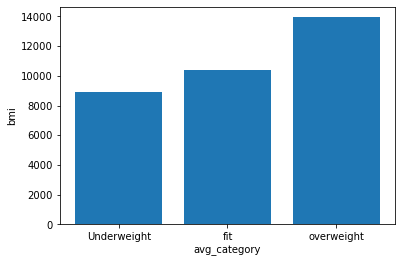

In [42]:
bmi=['Underweight','fit','overweight']
avg_category=[category_1,category_2,category_3]
plt.xlabel('avg_category')
plt.ylabel('bmi')
plt.bar(bmi,avg_category)

# 13. Draw line plot of expenditure against age and BMI

In [43]:
df_employee.head(2)

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.90,0,daily,yes,southwest,16884.9240
1,i10013,18,male,33.77,1,weekend,no,south,1725.5523


<AxesSubplot:xlabel='age', ylabel='expenditure'>

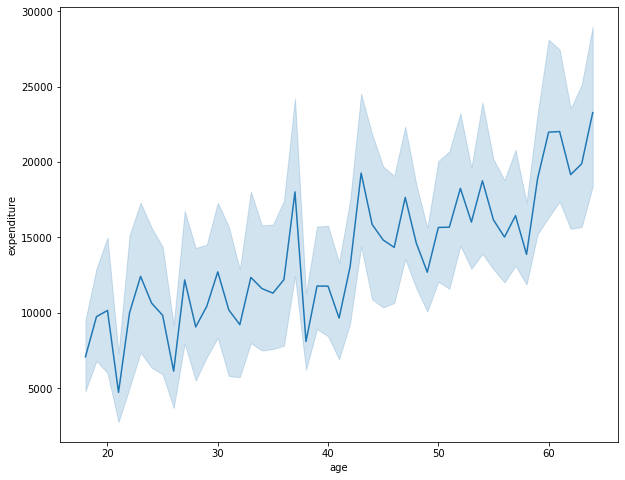

In [44]:
plt.figure(figsize=(10,8))
sns.lineplot(x=df_employee['age'],y=df_employee['expenditure'],data=df_employee)

<AxesSubplot:xlabel='bmi', ylabel='expenditure'>

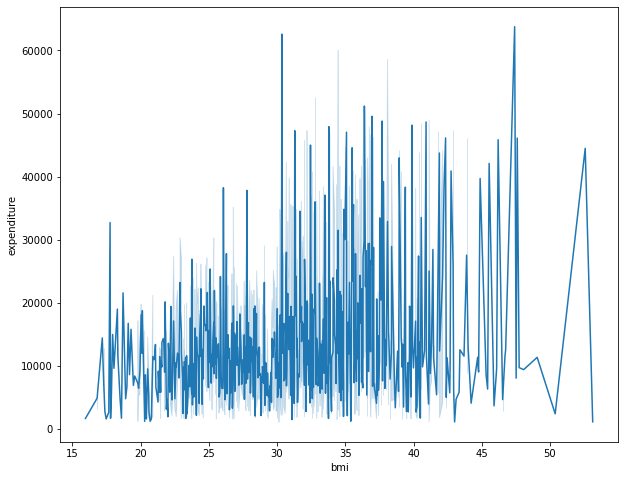

In [45]:
plt.figure(figsize=(10,8))
sns.lineplot(x=df_employee['bmi'],y=df_employee['expenditure'],data=df_employee)

# 14. Draw a bar chart to show zone wise average expenditure

In [118]:
bar_avg=df_employee.groupby('zone')['expenditure'].mean()

avg=bar_avg.to_frame().reset_index()

avg

,zone,expenditure
0,east,13774.679941
1,north,14102.583403
2,northeast,13694.721724
3,northwest,12151.702619
4,south,14715.689519
5,southeast,14452.949680
6,southwest,12717.083869
7,west,12182.998872


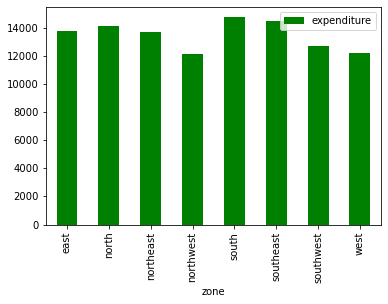

In [119]:

avg.plot.bar(x='zone',y='expenditure',color='g')
plt.show()

# 15. Draw a bar chart to show smoking and alcoholic habits against average expenditure

In [48]:
df_employee.head()

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520


In [49]:
data=df_employee.groupby('alcohol')['expenditure'].mean().to_frame()
x=data.index
y=data['expenditure']

<AxesSubplot:xlabel='alcohol', ylabel='expenditure'>

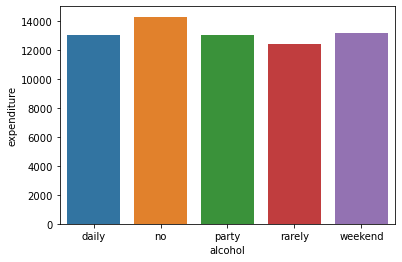

In [50]:
sns.barplot(x,y)

In [51]:
smoker_exp=df_employee.groupby('smoke')['expenditure'].mean().to_frame()

smoker_exp


,expenditure
smoke,
no,8434.268298
yes,32050.231832


<AxesSubplot:xlabel='smoke', ylabel='expenditure'>

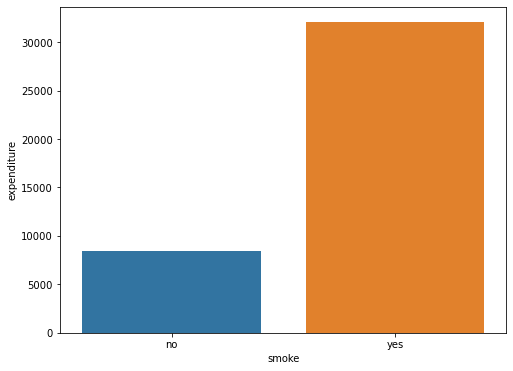

In [52]:
x=smoker_exp.index
y=smoker_exp['expenditure']

plt.figure(figsize=(8,6))
sns.barplot(x,y)

# 16. Draw pie chart for alcohol consumption habits

In [53]:
df_employee.head()

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520


In [54]:
employee=df_employee.groupby('alcohol')['expenditure'].mean().to_frame().reset_index()

employee

,alcohol,expenditure
0,daily,13001.772968
1,no,14277.090885
2,party,13050.583157
3,rarely,12419.686784
4,weekend,13145.632539


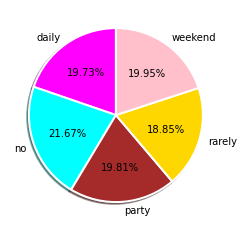

In [129]:
alcohol=employee['alcohol']
expense=employee['expenditure']
colr=['magenta','cyan','brown','gold','pink']
plt.pie(expense,labels=alcohol,autopct='%.2f%%',startangle=90,shadow=True, colors=colr,wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' }) #,explode=[0,0.2,0,0,0]
                 
plt.show()                

# 17. Draw scatterplot to see the relation between age and expenditure, keep smoking habit as hue

In [56]:
df_employee.head(2)

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.90,0,daily,yes,southwest,16884.9240
1,i10013,18,male,33.77,1,weekend,no,south,1725.5523


<AxesSubplot:xlabel='age', ylabel='expenditure'>

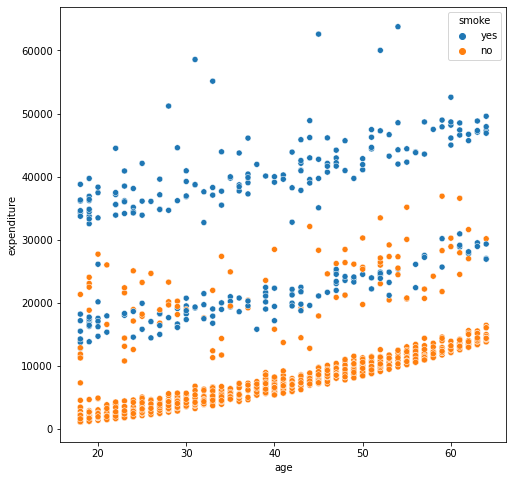

In [57]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='age',y='expenditure',data=df_employee,hue='smoke')

# 18. Draw distribution plot of expenditure

In [58]:
df_employee.head(2)

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.90,0,daily,yes,southwest,16884.9240
1,i10013,18,male,33.77,1,weekend,no,south,1725.5523


In [ ]:
## USING SEABORN

<AxesSubplot:xlabel='expenditure', ylabel='Density'>

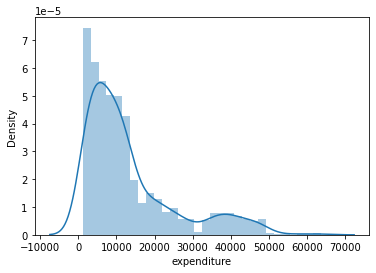

In [59]:
sns.distplot(df_employee['expenditure'])

# 19. Display the pairplot

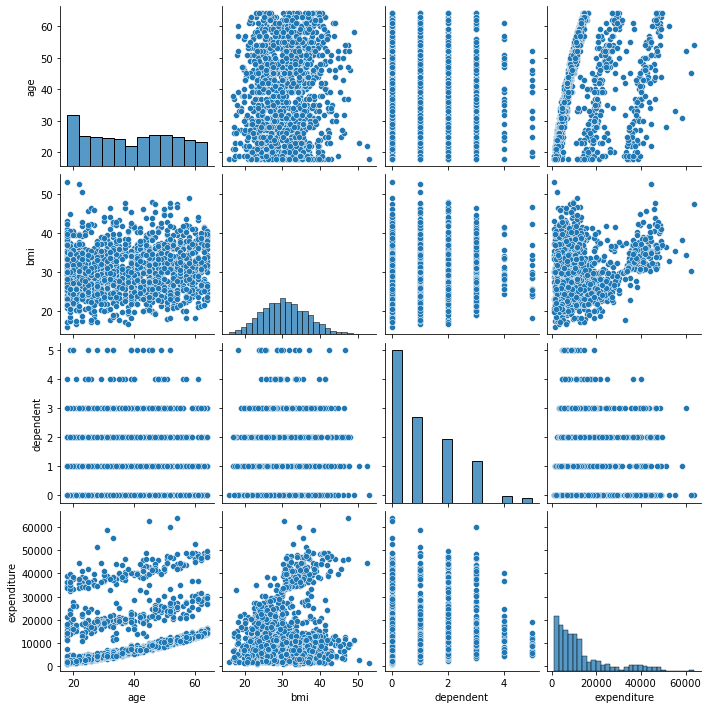

In [60]:
sns.pairplot(df_employee)

# 20. Display heatmap for the data  

<AxesSubplot:>

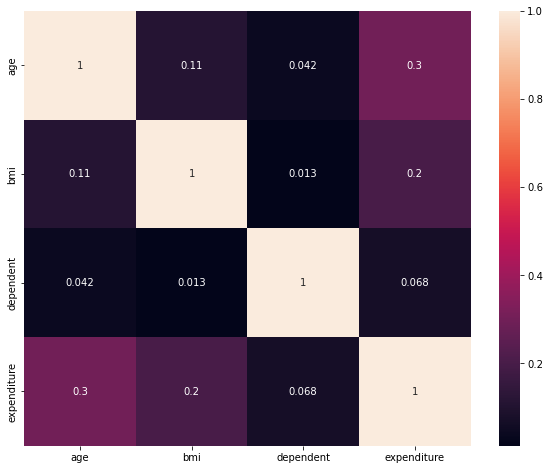

In [61]:
plt.figure(figsize=(10,8))
sns.heatmap(df_employee.corr(),annot=True)